In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import os,joblib,missingno
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression, Ridge, Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
#from sklearn.features.transformers import DataFrameSelector

In [2]:
###problem definition

In [4]:
File_path=os.path.join(os.getcwd(),'train.csv')
df_dimond=pd.read_csv(File_path)
df_dimond


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df_dimond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
df_dimond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df_dimond.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<AxesSubplot:>

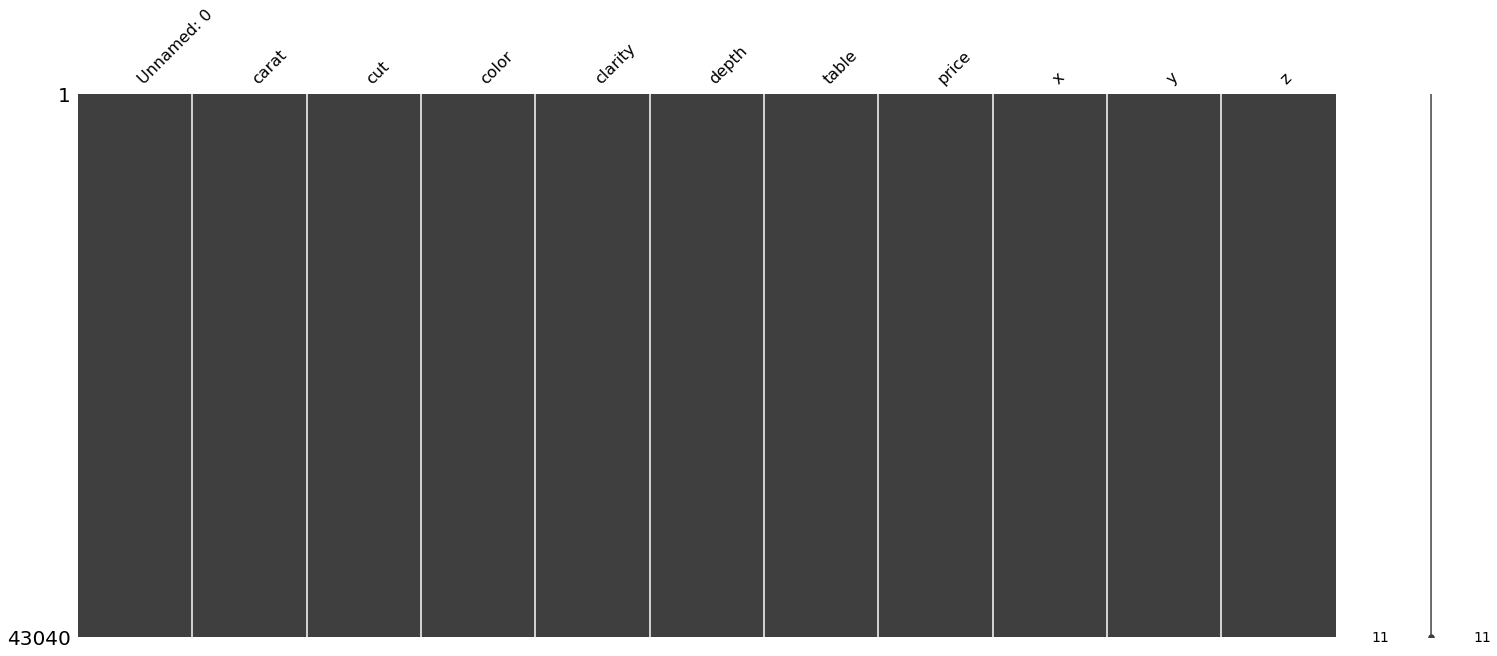

In [8]:
missingno.matrix(df_dimond)

In [9]:
###it seem there is about 200 null values in total bedroom

In [10]:
###exploratory data analysis

In [11]:
df_dimond['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

In [12]:
df_dimond['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [13]:
df_dimond['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

Text(0, 0.5, 'counts')

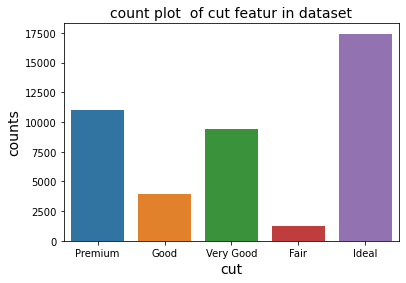

In [14]:
sns.countplot(x='cut', data=df_dimond)

plt.title('count plot  of cut featur in dataset' ,fontsize=14,c='k')
plt.xlabel('cut',fontsize=14,c='k')
plt.ylabel('counts',fontsize=14,c='k')

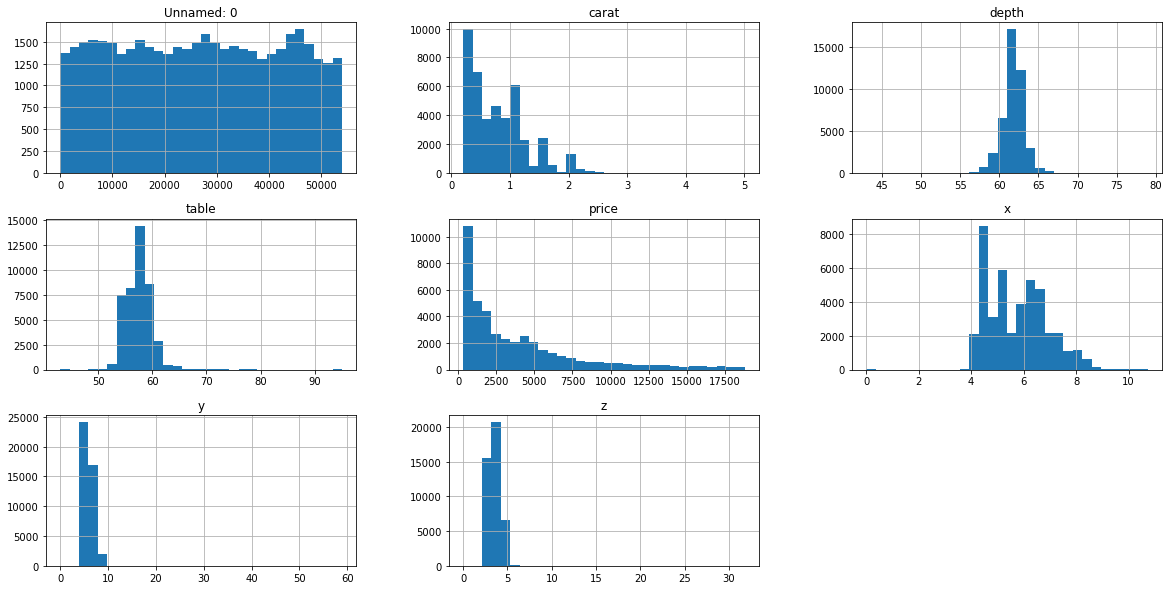

In [15]:
df_dimond.hist(bins=30,figsize=(20,10))
plt.show()

Text(0, 0.5, 'price')

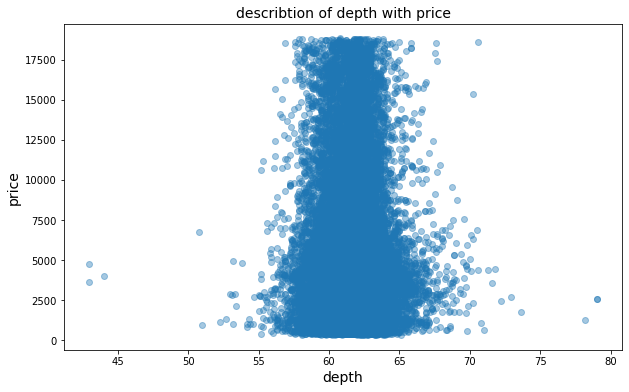

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['depth'],df_dimond['price'],alpha=0.4)


plt.title('describtion of depth with price' ,fontsize=14,c='k')
plt.xlabel('depth',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


Text(0, 0.5, 'price')

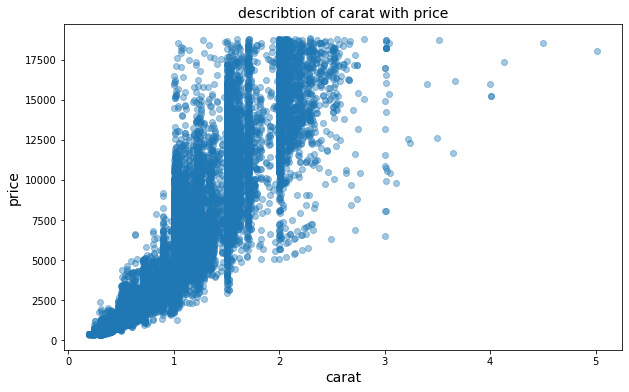

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['carat'],df_dimond['price'],alpha=0.4)


plt.title('describtion of carat with price' ,fontsize=14,c='k')
plt.xlabel('carat',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


Text(0, 0.5, 'price')

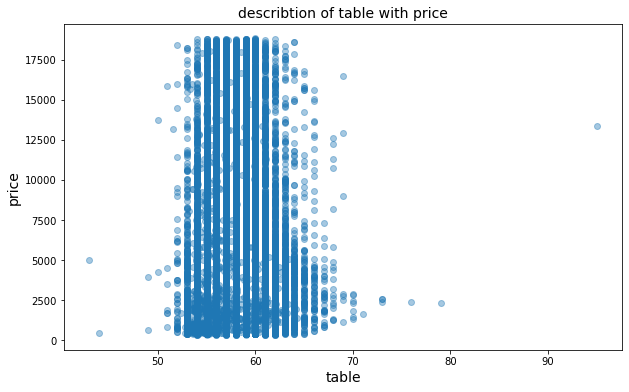

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['table'],df_dimond['price'],alpha=0.4)


plt.title('describtion of table with price' ,fontsize=14,c='k')
plt.xlabel('table',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


Text(0, 0.5, 'price')

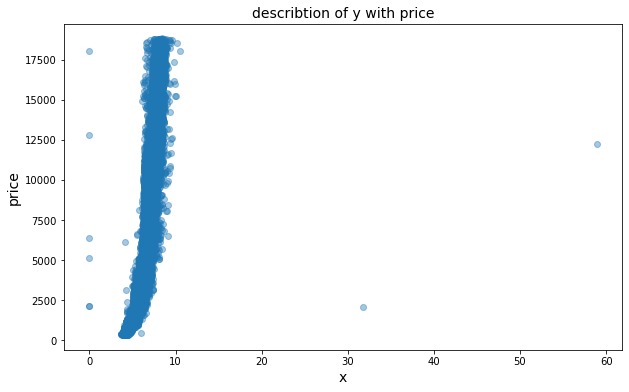

In [19]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['y'],df_dimond['price'],alpha=0.4)


plt.title('describtion of y with price' ,fontsize=14,c='k')
plt.xlabel('x',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


In [20]:
df_dimond['depth'].describe()

count    43040.000000
mean        61.746080
std          1.435246
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [21]:
depth_bins =pd.cut(x=df_dimond['depth'] , bins=[52.100000 , 56.200000 ,60.200000 ,64.200000,68.200000,71.700000],
        labels= ['52.200000>','56.200000>','60.200000>','64.200000>','68.200000>'])
depth_bins

0        56.200000>
1        60.200000>
2        60.200000>
3        60.200000>
4        60.200000>
            ...    
43035    60.200000>
43036    60.200000>
43037    60.200000>
43038    60.200000>
43039    60.200000>
Name: depth, Length: 43040, dtype: category
Categories (5, object): ['52.200000>' < '56.200000>' < '60.200000>' < '64.200000>' < '68.200000>']

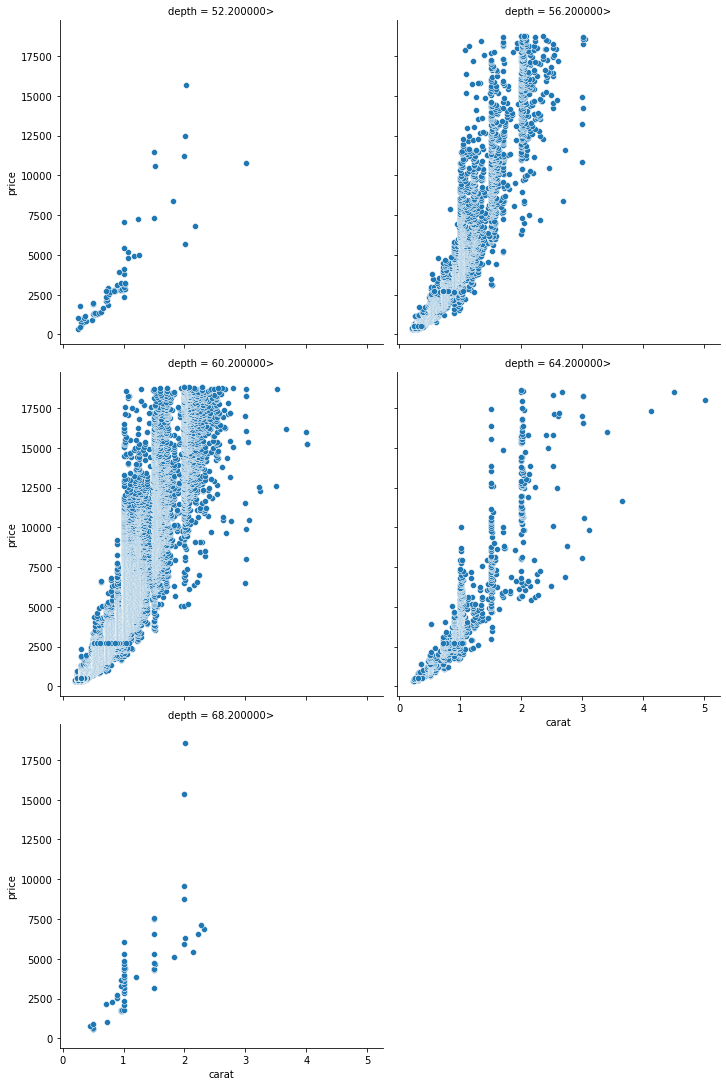

In [22]:
sns.relplot(x='carat',y='price',data=df_dimond,col=depth_bins,kind='scatter',col_wrap=2)

In [23]:
df_dimond['carat'].describe()

count    43040.000000
mean         0.796964
std          0.481455
min          0.200000
25%          0.380000
50%          0.710000
75%          1.030000
max          5.010000
Name: carat, dtype: float64

In [24]:
carat_bins =pd.cut(x=df_dimond['carat'] , bins=[0.220000 , 0.630000 ,1.030000 ,1.430000,1.830000,2.230000,2.600000],
        labels= ['0.230000>',' 0.630000>','1.030000>','1.430000>','1.830000>','2.230000>'])
carat_bins

0               NaN
1         0.230000>
2         0.230000>
3         0.230000>
4         0.230000>
            ...    
43035     0.630000>
43036     0.630000>
43037     0.630000>
43038     0.630000>
43039     0.630000>
Name: carat, Length: 43040, dtype: category
Categories (6, object): ['0.230000>' < ' 0.630000>' < '1.030000>' < '1.430000>' < '1.830000>' < '2.230000>']

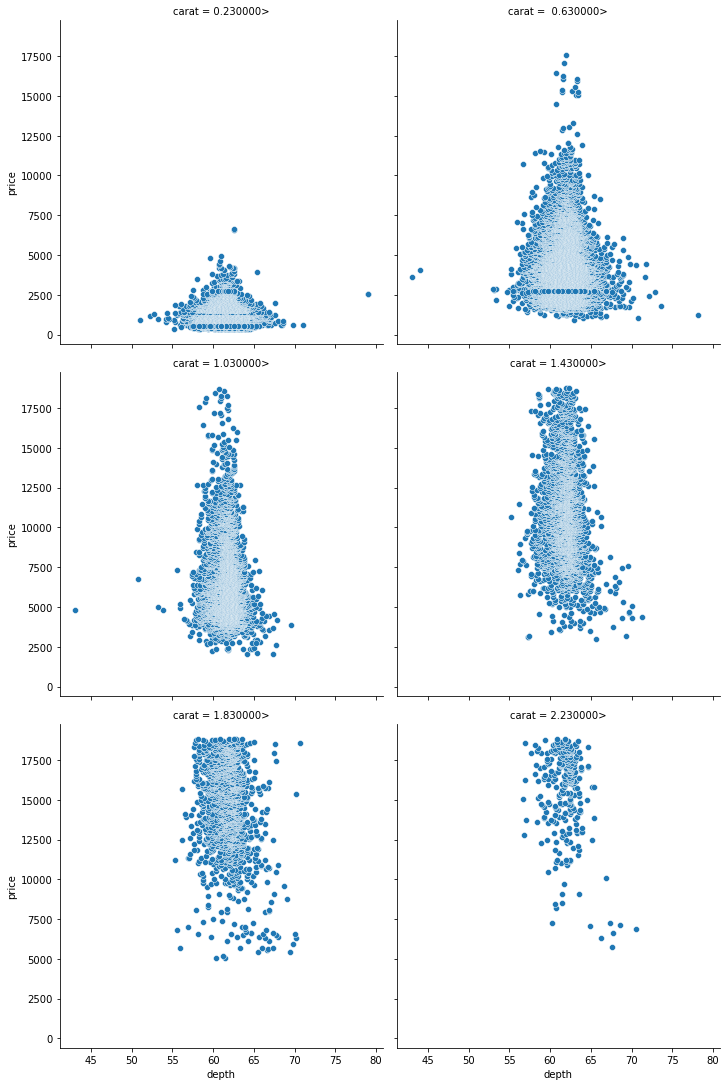

In [25]:
sns.relplot(x='depth',y='price',data=df_dimond,col=carat_bins,kind='scatter',col_wrap=2)

<AxesSubplot:xlabel='depth', ylabel='price'>

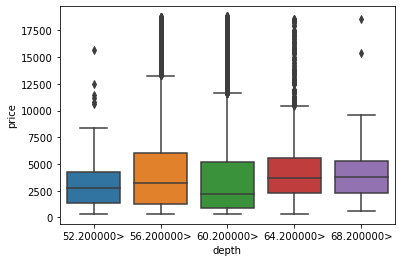

In [26]:
sns.boxplot(y='price',data=df_dimond,x=depth_bins)

<AxesSubplot:xlabel='carat', ylabel='price'>

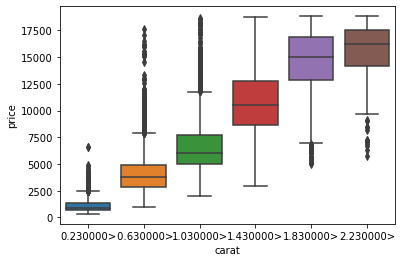

In [27]:
sns.boxplot(y='price',data=df_dimond,x=carat_bins)

In [28]:
# plt.figure(figsize=(10,6))

# sc=plt.scatter(df_housing['longitude'],df_housing['latitude'],s=df_housing['population']/100,c=df_housing['median_house_value'],)
# plt.colorbar(sc)

# plt.title('describtion of median enconm with median house value' ,fontsize=14,c='k')
# plt.xlabel('median_income',fontsize=14,c='k')
# plt.ylabel('median_house_value',fontsize=14,c='k')

In [29]:
df_dimond.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.374606,-0.040978,-0.116833,-0.301711,-0.407353,-0.395176,-0.400306
carat,-0.374606,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,-0.040978,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,-0.116833,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,-0.301711,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,-0.407353,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,-0.395176,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,-0.400306,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


In [30]:
df_dimond.corr()['price'].sort_values(ascending=False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

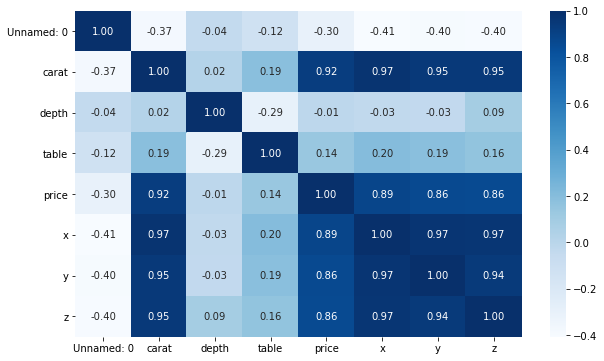

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df_dimond.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

In [32]:
###feature engeneering

In [33]:
df_dimond['size']=df_dimond['x']*df_dimond['y']*df_dimond['z']


In [34]:
df_dimond.corr()['price'].sort_values(ascending=False)

price         1.000000
carat         0.923801
size          0.900422
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

In [35]:
df_dimond =df_dimond.drop(['Unnamed: 0' , 'x' , 'y' ,'z'], axis=1)

Text(0, 0.5, 'price')

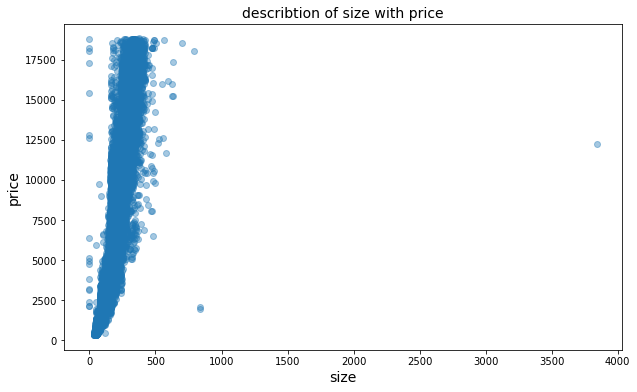

In [36]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['size'],df_dimond['price'],alpha=0.4)


plt.title('describtion of size with price' ,fontsize=14,c='k')
plt.xlabel('size',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


In [37]:
X=df_dimond.drop(columns='price',axis=1)
y=df_dimond['price']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True ,test_size=0.15 , random_state=42)

In [39]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (36584, 7)
y_train shape (36584,)
X_test shape (6456, 7)
y_test shape (6456,)


In [40]:
###deatiling with null

In [41]:
num_cols=[col for col in X_train.columns if X_train[col].dtype in ['int32', 'int64' , 'float32','float64']]
categ_cols=[col for col in X_train.columns if X_train[col].dtype not in ['int32', 'int64' , 'float32','float64']]

In [42]:
num_cols

['carat', 'depth', 'table', 'size']

In [43]:
categ_cols

['cut', 'color', 'clarity']

<AxesSubplot:>

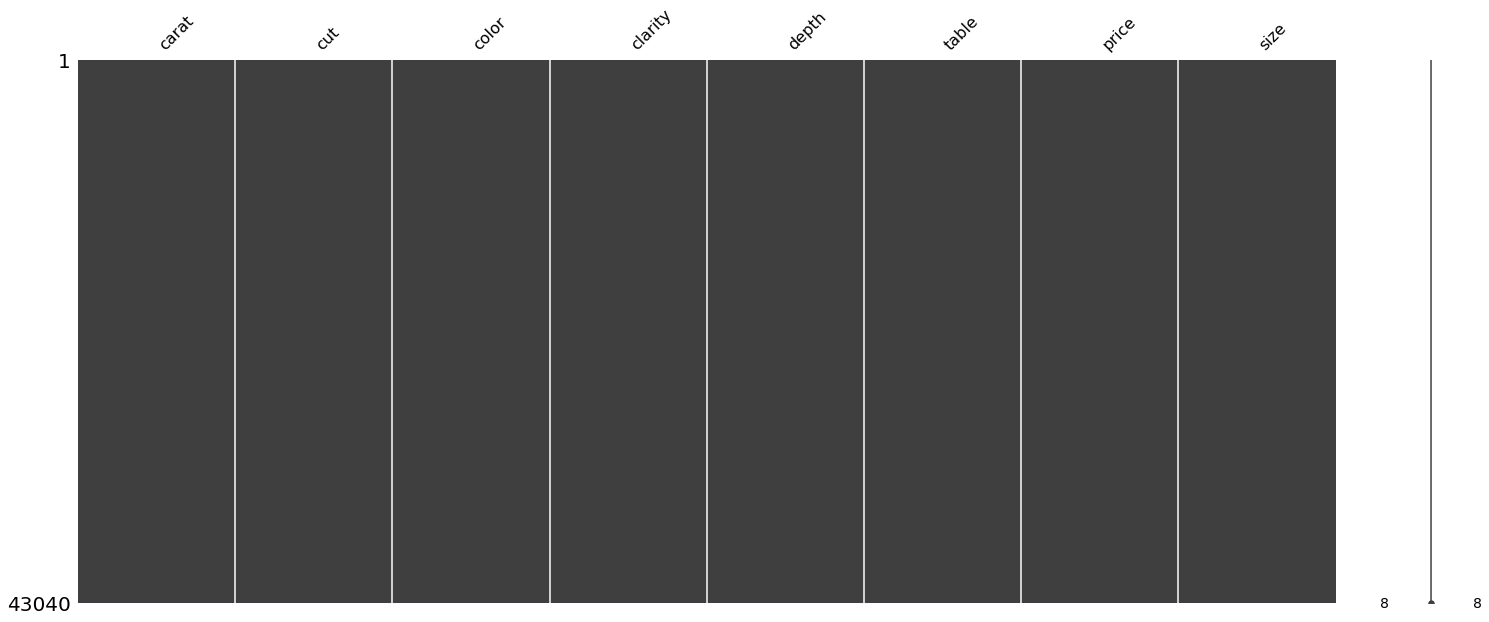

In [44]:
missingno.matrix(df_dimond)

In [44]:
# imputer = SimpleImputer(strategy='median')
# # imputer.fit(X_train[num_cols])

In [45]:
###median values for cols
# imputer.statistics_

In [46]:
# # X_train_filled = imputer.transform(X_train[num_cols])

# X_train_filled = imputer.fit_transform(X_train[num_cols])

# X_test_filled = imputer.transform(X_test[num_cols])

# X_train_filled

In [47]:
# pd.DataFrame(X_train_filled)

In [48]:
# pd.DataFrame(X_train_filled).isna().sum()

In [45]:
###standarized the feature 

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled = scaler.transform(X_train[num_cols])

X_test_scaled = scaler.transform(X_test[num_cols])

In [46]:
scaler.scale_

array([ 0.4822275 ,  1.42449883,  2.24405032, 80.33288293])

In [47]:
X_train[num_cols].std(axis=0)

carat     0.482234
depth     1.424518
table     2.244081
size     80.333981
dtype: float64

In [48]:
pd.DataFrame(X_train_scaled)

,0,1,2,3
0,-1.031391,1.161823,-1.085980,-1.013852
1,-0.906968,0.038621,-1.085980,-0.869396
2,-0.782546,0.179021,-1.085980,-0.757586
3,0.440943,1.653224,0.696511,0.308837
4,-1.031391,0.389622,-1.085980,-1.005565
...,...,...,...,...
36579,0.420206,0.108821,-1.531603,0.432535
36580,0.814211,0.670422,1.587757,0.727563
36581,-1.031391,0.108821,1.587757,-1.011551
36582,-0.181170,1.372424,0.250888,-0.208303


In [53]:
num_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='median') ),
             ('scaler' ,StandardScaler())
         ])

X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])

In [54]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(X_train[categ_cols].values)

X_train_one_hot = ohe.transform(X_train[categ_cols].values)
X_test_one_hot = ohe.transform(X_test[categ_cols].values)

In [55]:
X_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
# ohe=OneHotEncoder(sparse=False)
# ohe.fit(X_train[categ_cols].values)

# X_train_one_hot = ohe.transform(X_train[categ_cols].values)
# X_test_one_hot = ohe.transform(X_test[categ_cols].values)

In [55]:
categ_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='constant',fill_value='missing') ),
             ('ohe' ,OneHotEncoder(sparse=False))
         ])

X_train_cat = categ_pipline.fit_transform(X_train[categ_cols])
X_test_cat = categ_pipline.transform(X_test[categ_cols])

In [61]:
X_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
X_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [59]:
X_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
X_test_scaled[0]

array([-0.09822121,  0.31942171,  0.25088817, -0.10415614])

In [61]:
f = np.column_stack((X_train_scaled,X_train_cat))


In [62]:
f_test=np.column_stack((X_test_scaled,X_test_cat))

In [63]:
pd.DataFrame(f)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.031391,1.161823,-1.085980,-1.013852,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.906968,0.038621,-1.085980,-0.869396,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.782546,0.179021,-1.085980,-0.757586,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.440943,1.653224,0.696511,0.308837,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.031391,0.389622,-1.085980,-1.005565,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36579,0.420206,0.108821,-1.531603,0.432535,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36580,0.814211,0.670422,1.587757,0.727563,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36581,-1.031391,0.108821,1.587757,-1.011551,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36582,-0.181170,1.372424,0.250888,-0.208303,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
pd.DataFrame(f_test)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.098221,0.319422,0.250888,-0.104156,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.181170,0.249222,2.033379,-0.158414,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.938634,1.091623,-0.194735,0.909601,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.514653,1.161823,0.696511,2.377286,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.498536,1.442624,1.142134,1.436883,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,-0.989917,-1.365381,-0.194735,-0.968479,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6452,-1.031391,0.108821,1.142134,-1.011561,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6453,1.457061,-1.505782,1.142134,1.451705,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6454,1.457061,0.951223,0.696511,1.370202,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#######################################################################
###             Randomforest regression with Grid                   ###
#######################################################################

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search1 = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search1.fit(f, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search_params1 = grid_search1.best_params_
print('best_xgb_params -- ', grid_search_params1)

best_xgb_params --  {'max_features': 8, 'n_estimators': 30}


In [68]:
best_grid_search1 = grid_search1.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search1)

best_xgb --  RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [70]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_grid_search1, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_grid_search1, X=f, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')

RMSE Scores Using Tuned Tuned XGBoost --- [598.3198 573.1658 591.6013 614.5244 554.5014]
Mean of RMSE Scores Using Tuned XGBoost --- 586.4225
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 586.7904


In [65]:
# grid_pred = grid_search.predict(f_test)

In [66]:
lr=r2_score(y_test,grid_pred)
lr


0.9988598804943298

In [74]:
###########################################
###   SGD Regression  with grid search  ### 
###########################################

In [71]:
param_grid2 = [
    { 'alpha': [0.001, 0.0005, 0.0001, 0.005]},
    
    
  ]


sgd_reg = SGDRegressor(penalty='l2',eta0=0.001 ,  shuffle=True, max_iter=10000)

grid_search = GridSearchCV(sgd_reg, param_grid2, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(f, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(eta0=0.001, max_iter=10000),
             param_grid=[{'alpha': [0.001, 0.0005, 0.0001, 0.005]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search_params = grid_search.best_params_
print('best_xgb_params -- ', grid_search_params)

best_xgb_params --  {'alpha': 0.0001}


In [76]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  SGDRegressor(eta0=0.001, max_iter=10000)


In [77]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_grid_search, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_grid_search, X=f, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}') 

RMSE Scores Using Tuned Tuned XGBoost --- [1233.9509 1169.0836 1112.0812 1182.2226 1156.0605]
Mean of RMSE Scores Using Tuned XGBoost --- 1170.6798
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 1174.5832


In [ ]:
#######################################################################
###          Random forest regression without grid search           ###
#######################################################################

In [85]:
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(f, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [87]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=f, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}') 

RMSE Scores Using RandomForest --- [ 974.5586  986.5097  981.583  1045.0187  966.6736]
Mean of RMSE Scores Using RandomForest --- 990.8687
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 991.2618


In [ ]:
############################################################################
####                     linear regression                              ####
############################################################################

In [82]:

lin_reg = LinearRegression()
lin_reg.fit(f, y_train)  ## train



LinearRegression()

In [83]:


## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=f, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D



RMSE Scores Using LinearRegression --- [1199.6913 1169.3308 1113.5063 1179.7036 1155.6091]
Mean of RMSE Scores Using LinearRegression --- 1163.5682
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 1163.9266


In [ ]:
#################################################################################
###                      redge regression                                     ###
#################################################################################

In [88]:
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(f, y_train)  ## train the model


Ridge(alpha=0.9, solver='cholesky')

In [89]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=f, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D


RMSE Scores Using Ridge --- [1200.2195 1169.2865 1113.4258 1179.7456 1155.6143]
Mean of RMSE Scores Using Ridge --- 1163.6584
************************************************************************************************************************
RMSE after prediction Using Ridge --- 1164.0208


In [ ]:
#########################################################################
###               redge regression with grid search                   ####
#########################################################################

In [102]:
param_grid2 = [
    { 'alpha': [ 0.9, 0.1,0.009, 0.00005,0.001 ,0.0009]},
    
    
  ]


rdg_reg = ridge_reg = Ridge( solver='cholesky')

grid_search3 = GridSearchCV(rdg_reg, param_grid2, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search3.fit(f, y_train)

GridSearchCV(cv=5, estimator=Ridge(solver='cholesky'),
             param_grid=[{'alpha': [0.9, 0.1, 0.009, 5e-05, 0.001, 0.0009]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
grid_search3_params = grid_search3.best_params_
print('best_xgb_params -- ', grid_search3_params)

best_xgb_params --  {'alpha': 5e-05}


In [104]:
best_grid_search3 = grid_search3.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search3)

best_xgb --  Ridge(alpha=5e-05, solver='cholesky')


In [105]:
rmse_scores_tuned_xgb = cross_val_score(estimator=best_grid_search3, X=f, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_grid_search3, X=f, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}') 

RMSE Scores Using Tuned Tuned XGBoost --- [1199.645  1169.3308 1113.4931 1179.7036 1155.6091]
Mean of RMSE Scores Using Tuned XGBoost --- 1163.5563
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 1163.9145
